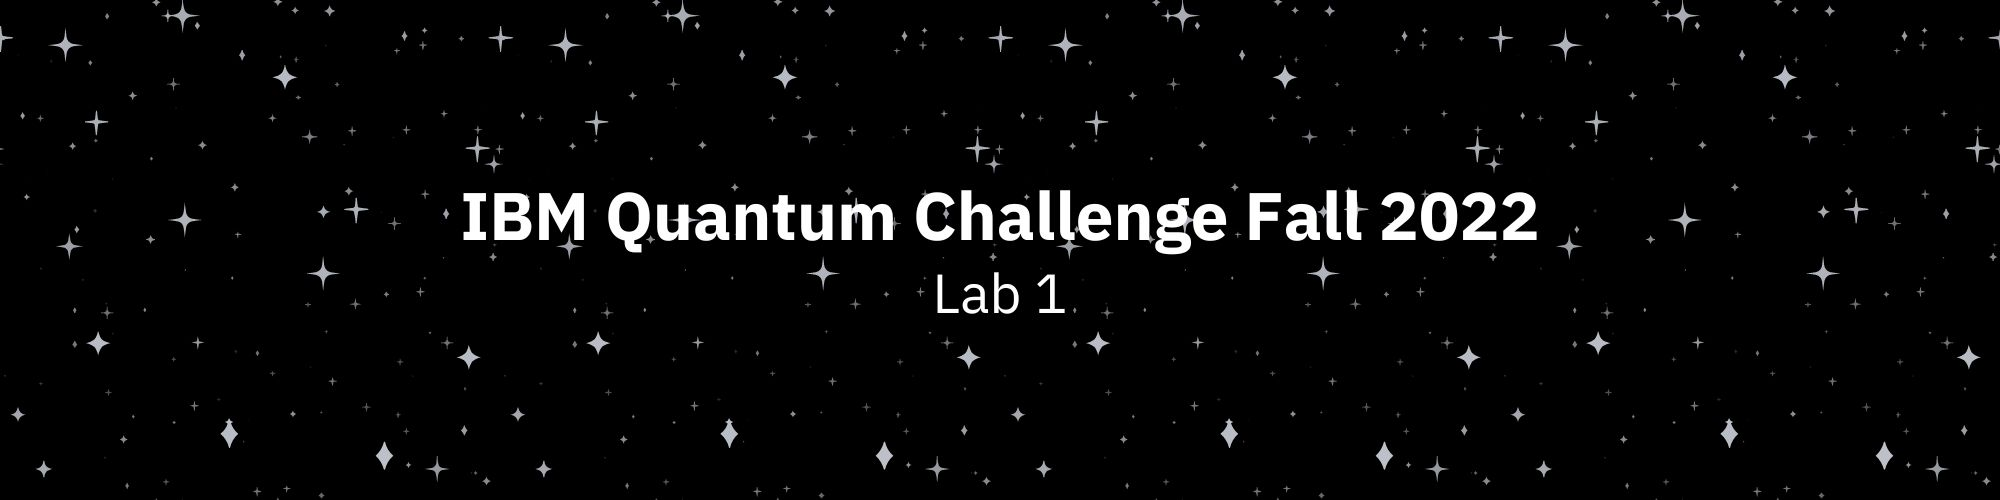

# Qiskit Runtime Primitives

## "Primitive" とは
Primitives は、量子計算を行うユーザー、量子アルゴリズムを実装する開発者、複雑な問題を解決し新しいアプリケーションを提供する研究者のための、基本的な構成要素です。

量子計算の観点からその意味を考える前に、 **Primitive(プリミティブ)** という言葉が何を意味するのかを考えてみましょう。

**生物学者**に「プリミティブとは何か」と尋ねると、おそらく「共通の祖先から受け継いだ性質、特性、特徴」と答えるでしょう。  
**数学者**であれば、「有限体において、その体の乗法的要素群の生成元となる要素」と答えるかもしれません。  
**CADモデルの設計者**なら、「複雑な幾何学的形状を構築するために使用できる、システム上で最も単純な形状」と説明するかもしれません。

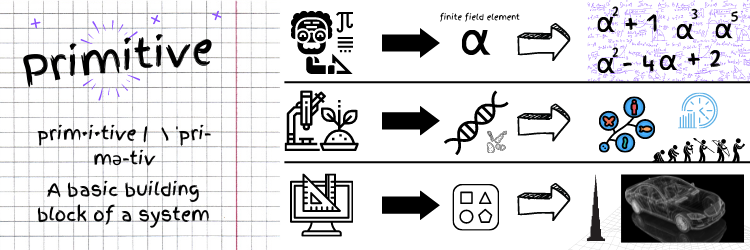

これらから、分かることは何でしょうか？  
これらの定義には、1つの共通点があります。それは、プリミティブとは、より複雑な要素を構成する**基本的な要素**であると定義していることです。

さて、一般的なコンピューティングに関して、「プリミティブ」という言葉はどういう意味になるでしょうか。ここでは、言語プリミティブについて見ていきましょう。  
言語プリミティブとは、あるプログラミング言語で利用できる最も単純な不可分の要素と定義することができます。コンピューターの中のものはすべて0と1で記憶されているだけだと聞いたことがあると思います。  

とはいえ、2進数をプログラミング言語の基本構成要素とすると、プログラムの扱いが本当に大変なことになります。そこで高級プログラミング言語におけるプリミティブ、ここでは特にプリミティブ・データ型について考えてみましょう。  
言語によっては、一般にそれ以上分割できないデータ型があり、それを組み合わせることで、より複雑なデータ型を構築することができます。

例えばPythonでは、`int`、`float`、`string`、`boolean` はプリミティブ・データ型であり、  
また、**string(文字列)の配列** 、**名前のリスト** 、**10進座標系のタプル**、**integer(整数)の集合** のようなより複雑なデータ構造は、プリミティブ・データ型によって構築されたプリミティブではないデータ型として考えられています。

では、「関数」に関しても同じように定義できるのでしょうか？  
プリミティブ関数は、先ほどの考え方から、使い方次第でより複雑で高度なプログラム要素やインタフェースを構築できる、インタフェースやコードセグメントとみなすことが出来ます。

**なるほど、それが量子とどのような関係があるのですか？**

言語プリミティブの例で説明したように、正確には（技術的には）2進数やマシンコードがプログラムをコンパイルする際の核となる構成要素であることはわかっていますが、よりプログラムの構築を簡単にできるように「プリミティブ」というより上位の言葉を定義しているのでした。

ほとんどの場合、主要なコンパイル型言語には効率的なコンパイラ処理が備わっていると期待されており、それによって私たちが使用するシステムに適した最適な実行処理が実現されています。だからこそ、私たちはその言語が提供する基本的な構文や機能を使ってプログラムを作ることができるのです。

**では、量子についての質問です：量子計算のルーチンやワークフローに同様の構造を定義する方法はあるのでしょうか？**

## Qiskit Runtime Primitives

Qiskit では Qiskit Runtime は、クラウドQPUを効率的に使うために、コンテナ技術を用いた新しい実行モデルを導入し、これにより、従来よりも低遅延で効率的な量子処理が可能になりました。

さらに、 Qiskit Runtime Primitives という新しいプログラミングインターフェースによって、スケーラブルで柔軟な開発がしやすくなりました。

### Sampler と Estimator
量子計算のための Primitives を定義するために、 Qiskit は2つの案を提供しています。  
量子計算の基本的な構成要素は複数存在するため、今後、さらに追加される予定です。ここでは、2つの基本的な Primitives を定義しましょう。

量子コンピューターが古典コンピューターと異なる点は、**出力に非古典的な確率分布を生成できる**ことで、この点が重要です。そのため、同じ回路を複数回実行することで、確率分布として有用な情報を得ることができます。

確率分布から得られる2つの有用な情報、**a)サンプリング**、**b)期待値の推定**、に基づいて **Sampler** と **Estimator** という2つの Primitives を定義しました。

---

Samplerは、その名の通り、量子回路の出力からサンプリングして、擬似的な確率分布を推定します。出力からサンプリングすることで、量子回路の擬確率分布全体を推定することができます。この機能は、回路設計の際に回路全体の分布データを扱う場合に特に有効です。  
つまり、ユーザーからの回路を入力とし、エラー緩和された擬確率を出力するプログラムです。これにより、ユーザーはエラー緩和を用いたショット測定結果をより正確に評価することができ、破壊的干渉の文脈で複数の関連するデータポイントの可能性をより効率的に評価することができるようになります。

要するに、回路を実行させたときに得られるおなじみの `counts` の出力と非常によく似ていますが、 Sampler は、エラー緩和ルーチンの結果として擬確率分布の出力を得ることができます。

簡単に言えば、より広い範囲の情報データを自由に使えるようになったのです。  
擬確率分布から得られる情報は，真の確率分布の尤度を調べたり，サンプリングのオーバーヘッドと引き換えに不偏の期待値ポイントを計算したりするのに，より関連性があると思われます。これらの分布はある意味で真の確率論と同じように振る舞いますが、異なるのは、元の理論の制約がいくつか緩和されていることです。その1つが、「負の」確率を表す負のデータポイントが存在する可能性です（ただし、集合的に和が1になることはあります）。また、このデータから、使用状況に基づいて真の確率分布を推定することもできます。（例：グローバー探索、QSVMルーチン、スタビライザー計算、最適化ルーチン）

Smaplerは出力全体に対する完全な分布を与えますが、特定の結果に興味がある場合もあるでしょう。そこで、**Estimator** を見てみましょう！

---

Estimatorは、基本的に注目する演算子の期待値を計算し出力します。  
回路とオブザーバブルを取り込み、与えられたパラメータに対する期待値と分散を効率的に評価するプログラム・インターフェースです。この Primitive により、多くのアルゴリズムで必要とされる量子演算子の期待値の計算を効率的に行うことができます。

ある問題に対して最終的な解を求めることに興味があり、カウントの完全な分布を調べる必要がない人は、Estimator の方が便利だと感じるでしょう。このルーチンは、 near-term の量子アルゴリズムに役立つものです。 Estimator は回路だけでなく、分子の電子構造、最適化問題のコスト関数などオブザーバブルの期待値を計算します。

### Qiskit Runtimeを使う理由

では、なぜ Primitive という新しいプログラミングパラダイムにこだわるのでしょうか？  
答えは Qiskit Runtime サービスとのインターフェースと、その上に構築された強力なサービス・フレームワークを活用して効率的な量子計算を実現するためです。

先ほどはプログラムにおいて、最適化されたワークフローを実現するためにコンパイラーを前提として、より高度な開発を可能にする言語プリミティブを定義しましたが、 Qiskit Runtime は以下のような効果が期待されます。

- **効率** : 
バックエンド用に設計された反復処理ワークロードのための高度に最適化されたルーチンとオプションによって効率化されます。
- **レイテンシー** : 
Sessionsフレームワークを使用したスケジューリング、ジョブの優先順位付け、共有キャッシュにより、投入されたルーチンのレイテンシーを低減し、結果を迅速に提供します。
- **一貫性** : 
既存のプリミティブモデルを補完する新しい機能を追加し、サービス全体の複雑なルーチンの上に構築する一貫したプログラミングモデルです。
- **カスタマイズ性** : 
コンテキストとジョブのパラメーターに基づいて回路をカスタマイズし、反復ルーチンをマネージします。
- **エラーの軽減と抑制** : 
情報の質を高めるために、シンプルな抽象化されたインターフェースでエラー軽減・抑制のための最先端の研究成果を取り入れます。

Qiskit Runtime サービスでは、 Primitive を使うことでこれらをすぐに享受できます。さっそく試してみましょう！  
このノートブックでは、 Sessions フレームワークの下 Sampler と Estimator を使用する基本的な方法と、現在利用可能なエラー緩和の手法を紹介します。

In [1]:
import qiskit
qiskit.__version__

'1.4.2'

In [2]:
# instance = #<WRITE YOUR INSTANCE HERE>
# token = #<WRITE YOUR API TOKEN HERE>

# instance = #<WRITE YOUR INSTANCE HERE>
# token = #<WRITE YOUR API TOKEN HERE>

In [3]:
#####  ライブラリーの導入
import time
import numpy as np
from qiskit import *
from qiskit.circuit import Parameter
from qiskit.quantum_info import Statevector, Pauli, SparsePauliOp
from qiskit.circuit.library import RealAmplitudes
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
from qiskit.visualization import plot_histogram

## Qiskit Runtime を使ってみる

Qiskit Runtimeを使い始めることにします。

ローカルシステムで実行している場合、Qiskit Runtime パッケージをインストールする必要があるかもしれません：`pip install qiskit-ibm-runtime` でインストールできます。

ここではまず`QiskitRuntimeService`を定義してQiskit Runtimeのすべての要素を使用できるようにし、`Sampler`と`Estimator` Primitive を必要に応じて呼び出すことができるようにします。

```{important}

```

## Primitives を使ってみる
それでは、Primitives構築の勘どころを、少しずつ押さえていきましょう。  
まず、最初のPrimitivesはSampler primitiveです。ベルンシュタイン・ヴァジラニ アルゴリズムを使ってデモを行います。

### Samplerその1: ベルンシュタイン・ヴァジラニのアルゴリズム

ベルンシュタイン・ヴァジラニ　アルゴリズムは、量子コンピューターを複雑な問題に適用した場合に優位性があることを示した量子アルゴリズムのうちの一つです。

秘密のビット文字列 $s = s_1, s_2, \cdots s_n$ が与えられたとき、入力 $x = x_1, x_2, \cdots x_n$ に対してパラメータ $s$ を持つブラックボックス関数 $f$ が与えられたとき、何回か $x$ を問い合わせて秘密のビット文字列 $s$ を推定する問題を考えます。

$$ f(x) = s ⋅ x (\mathrm{mod} 2) $$

秘密のビット文字列を見つけるには通常関数 $f$ を $n$ 回呼び出す必要があります。しかし、量子コンピューターを使用すると、関数を **1 回呼び出すだけ** で100%の信頼度でこの問題を解くことができます。

アルゴリズムは非常にシンプルです。
1. 入力量子ビットを状態 $|0\rangle^{\otimes n}$ に初期化し、出力量子ビットを $|-\rangle$ に初期化する。
2. アダマールゲートを入力レジスターに適用する。
3. オラクルに問い合わせる。
4. アダマールゲートを入力レジスターに適用する。
5. 測定する。


> ベルンシュタイン・ヴァジラニのアルゴリズムは [重ね合わせと干渉の利用](https://quantum-tokyo.github.io/ibm-quantum-challenge-textbook/2022-autumn-lab1-bernstein-vazirani.html) のLabで詳しく触れているため、馴染みのない方はこちらを先にご覧ください。

ここでは秘密のビット文字列をパラメータに持つベルンシュタイン・ヴァジラニ関数を実装します。

In [4]:
def bernstein_vazirani(string):

    # Save the length of string
    string_length = len(string)

    # Make a quantum circuit
    qc = QuantumCircuit(string_length+1, string_length)

    # 1. Initialize each input qubit to apply a Hadamard gate and output qubit to |->
    qc.x(string_length)
    qc.h(range(string_length+1))
    qc.barrier()

    # 2. Apply an oracle for the given string
    # Note: In Qiskit, numbers are assigned to the bits in a string from right to left 
    string = string[::-1] # Reverse password to fit qiskit's qubit ordering
    for q in range(string_length):
        if string[q] == '1':
            qc.cx(q, string_length)
    qc.barrier()

    # 3. Apply Hadamard gates after querying the oracle
    qc.h(range(string_length))

    # Measurement
    qc.measure(range(string_length), range(string_length))

    return qc

ここで、上記の関数を呼び出して、定義されているベルンシュタイン・ヴァジラニ回路を構築します。

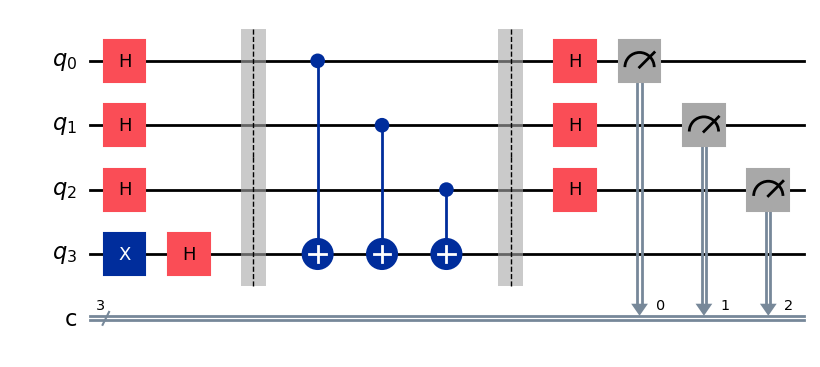

In [5]:
qc1 = bernstein_vazirani('111')
display(qc1.draw(output="mpl"))

この回路を実行する前に、先ほど述べたように、1つのSamplerセッションに対して複数の回路呼び出しと実行が可能です。そのことを示すために、もう1つベルンシュタイン・ヴァジラニ回路を作ることにします。

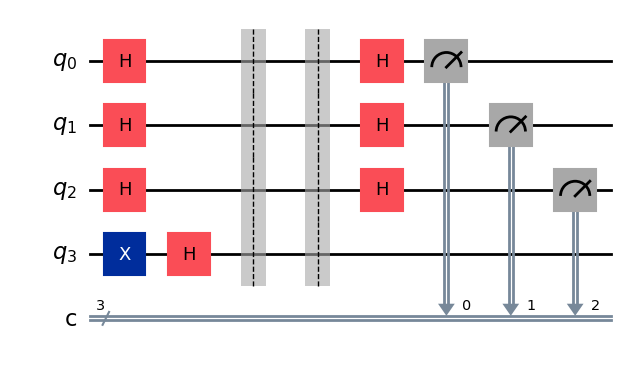

In [6]:
qc2 = bernstein_vazirani('000')
display(qc2.draw(output="mpl"))

#### Qiskit Runtimeを使って回路を実行する

Qiskit Runtime を使った量子回路の実行は3つのステップがあります。

1. 使用するBackendを設定する
1. 量子回路とオブザーバブルを実行先のバックエンドがサポートする操作に最適化（ISA: Instruction Set Architecture）する
1. Session (コンテキストマネージャー)を設定する
1. Session の中で Primitive の `Sampler` または `Estimator` をインスタンス化

**step1. 使用するBackendを設定する**  
まず、使用するバックエンドを設定しましょう。 ここでは、<s>クラウド上の`ibmq_qasm_simulator`上でルーチンを実行することにします。</s>ローカル上の`AerSimulator`上でルーチンを実行することにします。

```{important}
Quantum Utilityへの移行に伴い、当時Challengeで利用していたIBM Quantum&reg; クラウドシミュレータは廃止となりました。  
シミュレータ上での実行はの下記のいずれかを利用することになります。(詳細は[こちら](https://docs.quantum.ibm.com/api/migration-guides/local-simulators))

- `qiskit_ibm_runtime.fake_provider`の Fake backends: 特定のハードウェアを前提にシミュレーションしたい場合
- `qiskit_aer` の `AerSimulator`: より精度の高いシミュレーション結果を知りたい場合

Fake backendsを利用した例は [実際のバックエンドでVQCをテストする](https://quantum-tokyo.github.io/ibm-quantum-challenge-textbook/2024-spring-lab4-vqc-hw-ja.html) のLabで触れているので、ここでは `AerSimulator` を利用ます。
```

In [7]:
backend = AerSimulator()

**step2. 量子回路とオブザーバブルを実行先のバックエンドがサポートする操作に最適化（ISA: Instruction Set Architecture）する**  
`PrimitiveV2` のリリース以降この操作が必要となりました。このLabでは transpile のみの対応とします。
> 詳細は[Transpiler (2024)](https://quantum-tokyo.github.io/ibm-quantum-challenge-textbook/2024-spring-lab2-transpilation-ja.html)で解説されているのでこちらをご覧ください。

In [8]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)
isa_qc1 = pm.run(qc1)
isa_qc2 = pm.run(qc2)

**step3. Session　(コンテキストマネージャー)を設定する**

Session はクラウド上で Primitives を使用する際に、セッションを安全にオープン/クローズするためのコンテキスト・マネージャーの役割を果たします。これはコンストラクターがパラメーターを取り込み、 Sampler と Estimator のメソッドがキュー内のジョブを渡す`Session`キーワードを使用することで実現されます。  

> `Session`の構文は、シミュレータやローカルテスト時にはサポートしなくなり（文法エラーが出るわけではなく、無視される）、記述が不要となりました。  
> このLabではローカルテストのため、このステップは省略します。
> `UserWarning: Session is not supported in local testing mode or when using a simulator.`

**step4. Session の中で Primitive の `Sampler` または `Estimator` をインスタンス化**

In [9]:
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator

sampler = Sampler(backend=backend)
pub_results = sampler.run([isa_qc1, isa_qc2]).result()

In [10]:
[pub_result.data.c.get_int_counts() for pub_result in pub_results]

[{7: 1024}, {0: 1024}]

この結果、各回路から2つの結果が得られます。最初の回路`qc1`の隠れ文字列は`111`であり、最初の結果は7（7は2進数で111）です。この確率は1.0であり、この回路は100%確実に7を返すということです。同様に、2番目の結果は0（0は2進数で000）であり、その確率も1.0です。

### Samplerその2: パラメーター化された回路

Primitivesのメリットの1つは、パラメーター化された回路に複数のパラメーターをバインドするのが簡単になることです。  
回路にパラメーターをバインドする方法の例については、 **[Qiskit Document](https://docs.quantum.ibm.com/build/circuit-construction#parameterized-circuits)** をご覧ください。

ここでは制御Pゲート（制御位相ゲート）を使ったキックバックの例を紹介しましょう。  
**[Pゲート](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.PhaseGate)** を回転パラメーター`theta`でパラメター化します。

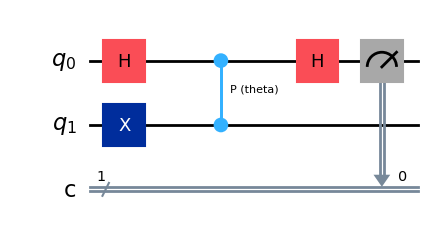

In [11]:
theta = Parameter('theta')

qc = QuantumCircuit(2,1)
qc.x(1)
qc.h(0)
qc.cp(theta,0,1)
qc.h(0)
qc.measure(0,0)

qc.draw("mpl")

上記の回路はパラメーター化されており、固有値は測定のために量子ビット 0 に戻されます。 キックバックの度合いは、パラメーター `theta` によって決まります。 下のセルで、上記の回路のパラメーターをリストとして定義します。ここでのパラメーターは、$0$ から $2\pi$ までを50等間隔のポイントで分割したものになります。

位相制御ゲートについて、異なる位相で回路を評価してみましょう：

In [12]:
phases = np.linspace(0, 2*np.pi, 50) # Specify the range of parameters to look within 0 to 2pi with 50 different phases

# Phases need to be expressed as list of lists in order to work
individual_phases = [[ph] for ph in phases]

上記の回路に適用する前に、ブロッホ球を使ってどのように見えるかをイメージしてみましょう。

In [13]:
# help understanding of how its phase is moving
from qiskit.visualization import plot_bloch_multivector

states = []

for i in range(0, 50, 10):
    
    temp = QuantumCircuit(2,1)
    temp.x(1)
    temp.h(0)
    temp.cp(individual_phases[i][0],0,1)
    temp.h(0)
    
    state = Statevector(temp)
    states.append(state)

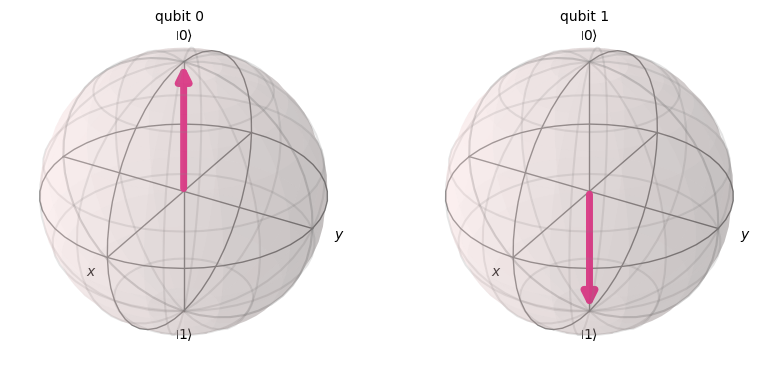

In [14]:
plot_bloch_multivector(states[0])

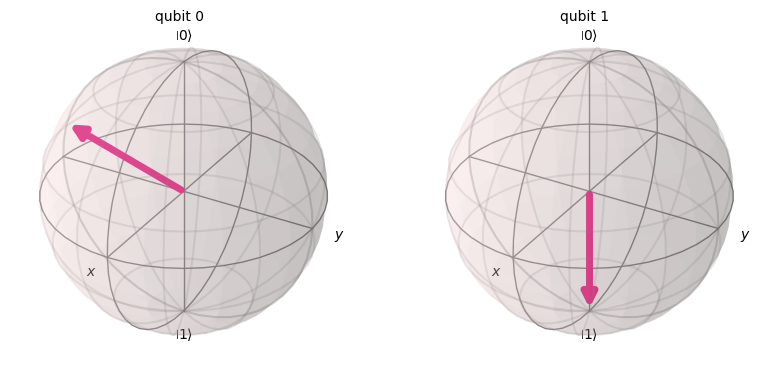

In [15]:
plot_bloch_multivector(states[1])

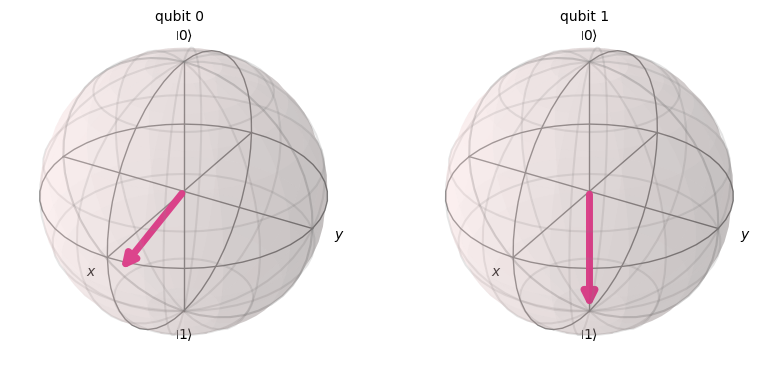

In [16]:
plot_bloch_multivector(states[2])

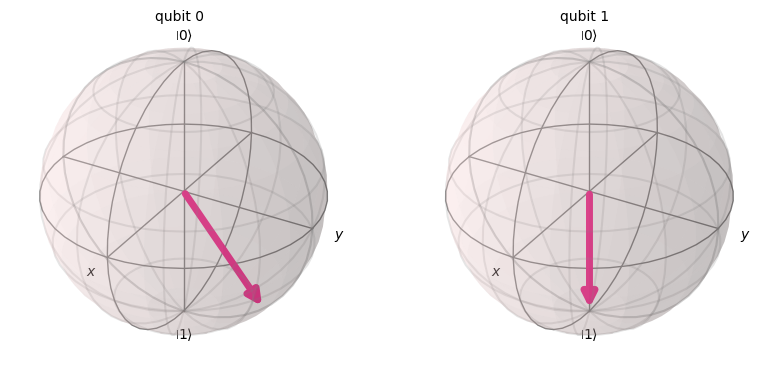

In [17]:
plot_bloch_multivector(states[3])

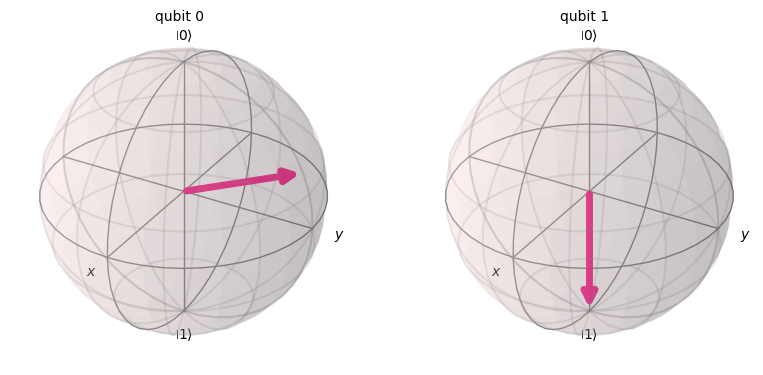

In [18]:
plot_bloch_multivector(states[4])

それぞれの位相で状態が変化し、Y-Z軸に沿って回転しているのがわかると思います。  
パラメーターをパラメーター化された回路リストにバインドし、個々の位相 `individual_phases` を `SamplerV2` を使用して上で作成した `qc` 回路にバインドします。 

ここでは、再び `SamplerV2` を使って、これらの回路をすべて実行し、パラメーターをバインドします。  
`SamplerV2`の run メソッドには、以下のパラメーターがあります。

>`pubs`: Iterable[SamplerPubLike] - PUB(Primitive Unified Blocs: 量子回路、オブザーバブル、パラメータ群、オプション) ライクなオブジェクトのイテラブル (ここでは量子回路とパラメータ群のリストと考えてください。)   
>`shots`: int - sampler pubごとにサンプリングするショットの総数

In [19]:
pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)
isa_qc = pm.run(qc)

In [20]:
sampler = Sampler(backend=backend)
pubs = [(isa_qc, parameter_values) for parameter_values in individual_phases]
pubs_result = sampler.run(pubs).result()

上のコードセルは、パラメーター化された回路を受け取り、Runtimeサービスを使ってバックエンドで実行します。このルーチンは各パラメーターを定義された回路に結びつけ、その結果得られたすべての回路を実行し、集合的な結果を得ることができます。

それでは、得られた結果と理論的に推測される結果をプロットしてみましょう。これらの回路について、1つの状態となる確率の準分布を求めます。各回路は位相パラメーターとして異なるtheta値を持つことになります。

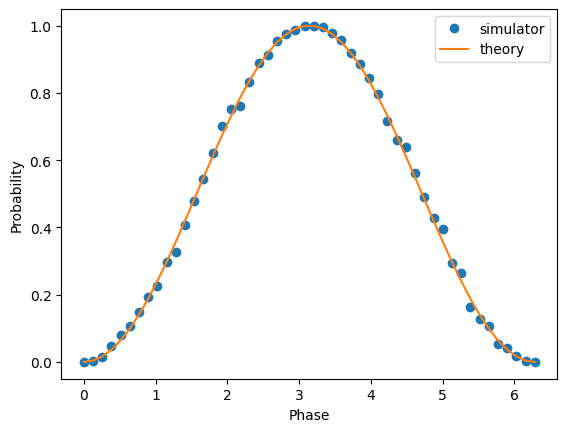

In [21]:
# The probablity of being in the 1 state for each of these values
num_shots = pubs_result[0].data.c.num_shots
pubs_result_counts_list = [pub_result.data.c.get_int_counts() for pub_result in pubs_result]
prob_values = [dist.get(1, 0) / num_shots for dist in pubs_result_counts_list]

plt.plot(phases, prob_values, 'o', label='simulator')
plt.plot(phases, np.sin(phases/2,)**2, label='theory')
plt.xlabel('Phase')
plt.ylabel('Probability')
plt.legend()

黄色い線が理論値で、青い点はバックエンドで実行したときの値です。ほぼ理論と一致していますが、シミュレータ固有のランダム性により、結果の分布のカーブには若干のずれが生じています。

ここまでは擬確率分布を見てきましたが、期待値の評価という観点からも見てみましょう。

### Estimator の例
Estimatorは、量子演算子の期待値を計算し、受け取ったものを提供します。Estimatorは、「測定操作がない」回路である必要があります。  
なぜかというと、VQEのようなアルゴリズムを実行する場合、 Estimator はハミルトニアンを得るために単一量子ビットの回転をバインドするので、測定をすることができないからです。

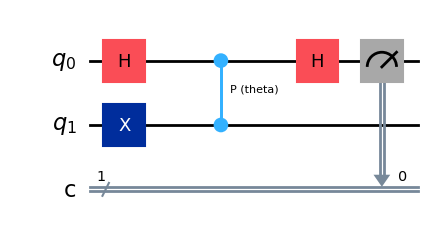

In [22]:
display(qc.draw(output="mpl"))

現在の回路`qc`には測定があるので、`remove_final_measurements`でこれを削除します。

In [23]:
qc_no_meas = qc.remove_final_measurements(inplace=False)

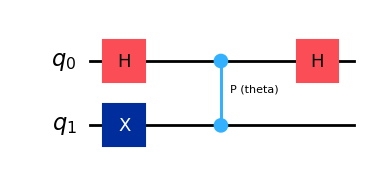

In [24]:
display(qc_no_meas.draw(output="mpl"))

期待値を計算するために、回路にオブザーバブルを設定する必要があります。ここでは、`ZZ` を使います。  
オブザーバブルの長さは回路の量子ビットの数と同じであることに注意してください。

In [25]:
ZZ = SparsePauliOp.from_list([("ZZ", 1)])
isa_ZZ = ZZ.apply_layout(qc_no_meas.layout)

期待値は以下の式で算出されます。

$$
\langle ZZ\rangle =\langle \psi | ZZ | \psi\rangle=\langle \psi|(|0\rangle\langle 0| -|1\rangle\langle 1|)\otimes(|0\rangle\langle 0| - |1\rangle\langle 1|) |\psi\rangle =|\langle 00|\psi\rangle|^2 - |\langle 01 | \psi\rangle|^2 - |\langle 10 | \psi\rangle|^2 + |\langle 11|\psi\rangle|^2
$$

上の式をよく見てから、次のセルを実行することを強くお勧めします。

In [26]:
estimator = Estimator(backend=backend)
pubs = [(qc_no_meas, ZZ, parameter_values) for parameter_values in individual_phases]
job = estimator.run(pubs)

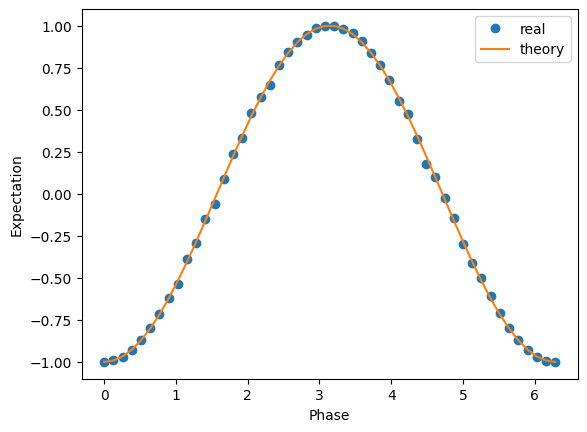

In [27]:
param_results = job.result()
exp_values = [float(param_result.data.evs) for param_result in param_results]

plt.plot(phases, exp_values, 'o', label='real')
plt.plot(phases, 2*np.sin(phases/2,)**2-1, label='theory')
plt.xlabel('Phase')
plt.ylabel('Expectation')
plt.legend()

## ハミルトニアンの計算

Estimatorの面白い使い方の一つは、特にオブザーバブルに関するハミルトニアンを計算するのに使えることです。

ハミルトニアンは量子力学的な演算子であり、運動エネルギーと位置エネルギーを含む系内の全エネルギー情報を持っています。  
そのためハミルトニアンの計算が必要であり、そのエネルギー値を計算できれば、自然界におけるエネルギーや、機械学習におけるコストを計算することができます。  
基底状態や励起状態を見つけることができるので量子物理学、量子化学、量子機械学習と密接に関係しています。

ハミルトニアンを計算するためには、パラメーター化された回路が必要です。[**RealAmplitudes**](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RealAmplitudes) を使えば、ランダムなパラメーター化された回路を簡単に作ることができます。以下にコード例を示します。

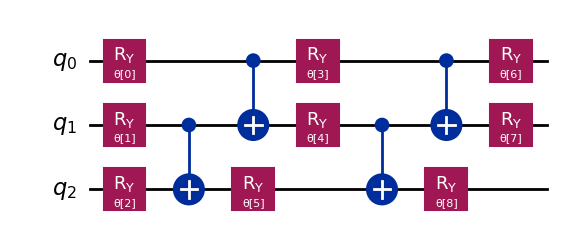

In [28]:
ansatz = RealAmplitudes(3, reps=2)  # create the circuit on 3 qubits
ansatz.decompose().draw("mpl")

この`ansatz`は3量子ビットの回路で、`reps` は2です。この場合、パラメータの総数は$3 \times (2+1) = 9$となります。

### Exercise 3: 期待値計算の推定ルーチンを構築
````{admonition} Exercise

特定の観測値に関するカスタムハミルトニアンの期待値を計算する推定ルーチンを構築します。解答は、[**EstimatorResult**](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.EstimatorResult) である必要があります。
    
$ \langle \psi_1(\theta) \lvert H_1 \lvert \psi_1(\theta)\rangle$, $ \langle \psi_2(\theta) \lvert H_2 \lvert \psi_2(\theta)\rangle$, $ \langle \psi_3(\theta) \lvert H_3 \lvert \psi_3(\theta)\rangle$をEstimatorを使って計算します。回路は全て5量子ビットで構成されています。
    
1. [**RealAmplitudes**](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RealAmplitudes)を使ってランダムな回路を作ります； $\psi_1(\theta) $はreps = 2 、 $ \psi_2(\theta) $はreps = 3、 $ \psi_3(\theta) $はreps = 4です。

```python
##### Make three random circuits using RealAmplitudes

psi1 = # build your code here
psi2 = # build your code here
psi3 = # build your code here
```

2. [**SparsePauliOp**](https://docs.quantum.ibm.com/api/qiskit/qiskit.quantum_info.SparsePauliOp)を使ってハミルトニアンを作ります。
    - $ H_1 = X_1Z_2 + 3Y_0Y_4 $
    - $ H_2 = 2X_3 $
    - $ H_3 = 3Y_2 + 5Z_1X_3 $

```python
##### Make hamiltonians using SparsePauliOp

H1 = # build your code here
H2 = # build your code here
H3 = # build your code here
```
    
3. [**numpy.linspace**](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)を使って0から1までの theta の値を等間隔に並べたリストを作ります。なお、各回路の`reps`が異なるため、パラメーターの数が異なります。

```python
##### Make a list of evenly spaced values for theta between 0 and 1

theta1 = # build your code here
theta2 = # build your code here
theta3 = # build your code here
```

4. セル内で定義された `options` を持つEstimatorを使って、各期待値を計算します。

```python
##### Use the Estimator to calculate each expectation value

estimator = # build your code here

# calculate [ <psi1(theta1)|H1|psi1(theta1)>,
#             <psi2(theta2)|H2|psi2(theta2)>,
#             <psi3(theta3)|H3|psi3(theta3)> ]
# Note: Please keep the order
job = # build your code here    

pubs_result = # build your code here
```

````

In [29]:
psi1 = RealAmplitudes(num_qubits=5, reps=2)
psi2 = RealAmplitudes(num_qubits=5, reps=3)
psi3 = RealAmplitudes(num_qubits=5, reps=4)

pm = generate_preset_pass_manager(target=backend.target, optimization_level=1)
isa_psi1 = pm.run(psi1)
isa_psi2 = pm.run(psi2)
isa_psi3 = pm.run(psi3)

In [30]:
H1 = SparsePauliOp.from_list([("IIZXI", 1), ("YIIIY", 3)])
H2 = SparsePauliOp.from_list([("IXIII", 2)])
H3 = SparsePauliOp.from_list([("IIYII", 3), ("IXIZI", 5)])

isa_H1 = H1.apply_layout(isa_psi1.layout)
isa_H2 = H2.apply_layout(isa_psi2.layout)
isa_H3 = H3.apply_layout(isa_psi3.layout)

```{toggle} 解説
`SparsePauliOp`を使ってハミルトニアンを定義しています。`H1`の二つ目の項は以下のように示されます。

    ("YIIIY", 3)

左の`"YIIIY"`は$Y_{0}Y_{4}$を示し、右の`3`は係数を示します。
この時、右から左の順番であることや`Identity gate`が含まれていることに注意してください。

また、バックエンドに渡す量子回路、オブザーバブルはISAに従っている必要があること忘れないようにしましょう。
```

In [31]:
theta1 = np.linspace(0, 1, 15)
theta2 = np.linspace(0, 1, 20)
theta3 = np.linspace(0, 1, 25)

```{toggle} 解説
0から1までの $\theta$ の値を各回路のパラメータ数に合わせて分割します。
例えば、

    RealAmplitudes(num_qubits=5, reps=2, insert_barriers=True)

![](resources/2022-autumn-lab1-ansatz.png)
で構築された回路の場合、パラメータの数は15になります。
```

In [32]:
estimator = Estimator(backend=backend)

# calculate [ <psi1(theta1)|H1|psi1(theta1)>,
#             <psi2(theta2)|H2|psi2(theta2)>,
#             <psi3(theta3)|H3|psi3(theta3)> ]
# Note: Please keep the order
pubs = [
    (isa_psi1, isa_H1, theta1),
    (isa_psi2, isa_H2, theta2),
    (isa_psi3, isa_H3, theta3)
]
job = estimator.run(pubs)
pubs_result = job.result()

In [33]:
for i, pub_result in enumerate(pubs_result):
    print(f"Expectation values of H_{i}: {pub_result.data.evs}")

Expectation values of H_0: 0.0068359375
Expectation values of H_1: 1.78515625
Expectation values of H_2: -0.9541015625


## 参考文献
- [1] **[Scalable mitigation of measurement errors on quantum computers - Paul D. Nation,∗ Hwajung Kang, Neereja Sundaresan, and Jay M. Gambetta](https://arxiv.org/pdf/2108.12518.pdf)**
- [2] **[Documentation: mthree (1.1.0)](https://qiskit.org/documentation/partners/mthree/index.html)**
- [3] **[Fake Provider (qiskit.providers.fake_provider - Qiskit Documentation](https://qiskit.org/documentation/apidoc/providers_fake_provider.html)**
- [4] **[Getting Started - Qiskit Research](https://github.com/qiskit-research/qiskit-research/blob/main/docs/getting_started.ipynb)**
- [5] **[Error mitigation for short-depth quantum circuits - Kristan Temme, Sergey Bravyi and Jay M. Gambetta](https://arxiv.org/pdf/1612.02058.pdf)**
- [6] **[Configure error mitigation - release notes](https://github.com/Qiskit/qiskit-ibm-runtime/blob/main/docs/how_to/error-mitigation.rst)**